In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.stats as stats


## Modeling CO₂, Temperature, and Their Relationship analyszing Climate Data

This lab applies regression methods to climate datasets. The goal is to fit and evaluate Linear Regression models using real observations.

We will:

- Load global atmospheric CO₂ and global temperature anomaly data
- Clean and reshape the data for analysis
- Fit regression models:
  - **CO₂ vs. Year**
  - **Temperature vs. Year**
  - **Temperature vs. CO₂**
- Compare **linear** and **polynomial** trends
- Generate short-term forecasts based on fitted models
- Evaluate models using:
  - Coefficients and intercepts
  - Residual plots
  - QQ-plots
  - OLS diagnostics (R², p-values etc.)

---


In [2]:
co2 = pd.read_csv("co2_levels.csv") 
co2.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,Date,Value
0,1,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M03,315.71
1,2,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M04,317.45
2,3,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M05,317.51
3,4,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M06,317.27
4,5,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M07,315.87


In [3]:
co2['Date'] = pd.to_datetime(co2['Date'], format="%YM%m", errors='coerce')
co2 = co2.dropna(subset=['Date'])

co2['Year'] = co2['Date'].dt.year
co2['Value'] = pd.to_numeric(co2['Value'], errors='coerce')
co2 = co2.dropna(subset=['Value'])

co2_yearly = co2.groupby('Year')['Value'].mean().reset_index()
co2_yearly.rename(columns={'Value':'CO2'}, inplace=True)

co2_yearly.head()


,Year,CO2
0,1958,315.237000
1,1959,172.459573
2,1960,158.600510
3,1961,158.937895
4,1962,159.354134


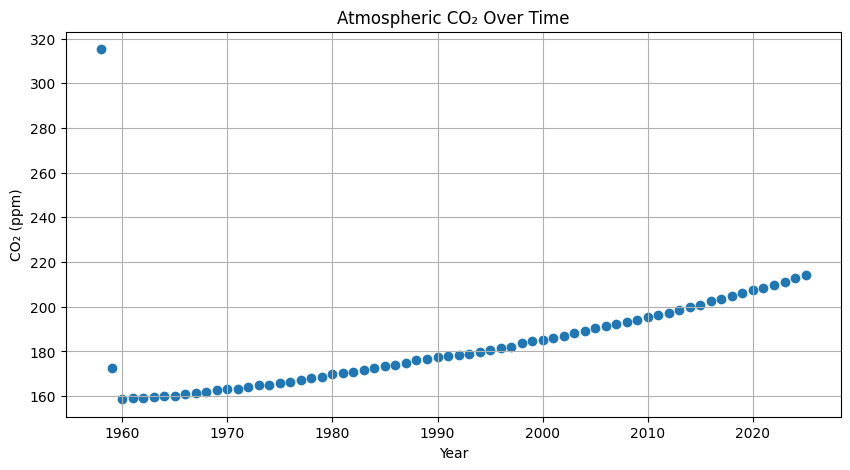

In [4]:
# Scatter plot for CO₂
plt.figure(figsize=(10,5))
plt.scatter(co2_yearly['Year'], co2_yearly['CO2'])
plt.title("Atmospheric CO₂ Over Time")
plt.xlabel("Year")
plt.ylabel("CO₂ (ppm)")
plt.grid(True)
plt.show()



## Exercise 1 — Linear Regression of Atmospheric CO₂ Over Time (2 points)

In this exercise, we fit a simple linear regression model to annual atmospheric CO₂ concentration data.  
The objective is to quantify the average yearly rate of increase in CO₂ and assess how well a linear trend describes the observations.

Steps performed:

- Remove the initial year (1959) to reduce starting-point irregularity
- Fit a linear model: **CO₂ = β₀ + β₁ × Year**
- Plot the fitted trend against observed data
- Examine model assumptions using:
  - Residual plot (checks randomness of errors over time)
  - Q–Q plot (checks normality of residuals)



CO₂ Slope (ppm/yr): 0.8464224328976834
Intercept: -1505.2924302663216


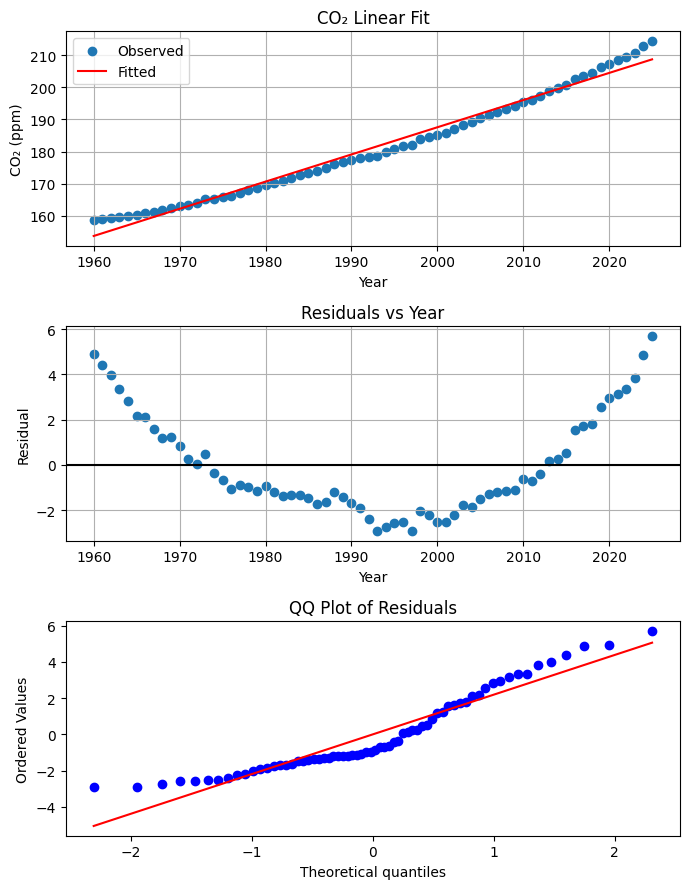

In [5]:
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
import matplotlib.pyplot as plt

# We remove the outlier from 1959
co2_yearly = co2_yearly[co2_yearly['Year'] > 1959]

X = co2_yearly[['Year']]
y = co2_yearly['CO2']

# ------------------------------------------------
# TODO — Fit a Linear Regression Model predicting CO₂ from Year
# ------------------------------------------------
# 1. Create a LinearRegression() model object
# 2. Fit it using X (year) and y (CO₂ concentration)
# 3. Use the model to predict CO₂ values (co2_pred)

m_co2 = LinearRegression()
m_co2.fit(X, y)
co2_pred = m_co2.predict(X)

# ----------------------------
# Implementation Ends Here
# ----------------------------

resid_co2 = y - co2_pred

print("CO₂ Slope (ppm/yr):", m_co2.coef_[0])
print("Intercept:", m_co2.intercept_)

# Subplots
fig, axes = plt.subplots(3, 1, figsize=(7, 9))

# 1. Fit plot
axes[0].scatter(co2_yearly['Year'], y, label="Observed")
axes[0].plot(co2_yearly['Year'], co2_pred, color='red', label="Fitted")
axes[0].set_title("CO₂ Linear Fit")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("CO₂ (ppm)")
axes[0].grid(True)
axes[0].legend()

# 2. Residual plot
axes[1].scatter(co2_yearly['Year'], resid_co2)
axes[1].axhline(0, color='black')
axes[1].set_title("Residuals vs Year")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Residual")
axes[1].grid(True)

# 3. QQ plot
stats.probplot(resid_co2, dist="norm", plot=axes[2])
axes[2].set_title("QQ Plot of Residuals")

plt.tight_layout()
plt.show()


## Questions (Optional)
**1. What does the residual plot suggest?**

It suggests the difference between the predicted value and the actual value.

**2. What does the QQ plot of residuals suggest?**

It suggests the linear relationship between the observed values and the theoretical quantiles.

**3. Do you think tehre is a linear realtionship betwene year and Co2 levels?**

Yes.



## Exercise 2 — Forecasting Atmospheric CO₂ Using the Linear Model (2 points)

In this step, we use the linear regression model from Exercise 1 to forecast future atmospheric CO₂ concentrations.

Procedure:

- Generate the next 10 years as future prediction points
- Apply the fitted model to estimate CO₂ values for those years
- Plot historical observations, the fitted model, and the forecast period


This exercise builds intuition for using regression models to make forward projections and for considering model limits when extrapolating beyond observed data.


Forecast for next 10 years:
   Year  Predicted_CO2
0  2026     209.559419
1  2027     210.405841
2  2028     211.252264
3  2029     212.098686
4  2030     212.945109
5  2031     213.791531
6  2032     214.637953
7  2033     215.484376
8  2034     216.330798
9  2035     217.177221


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


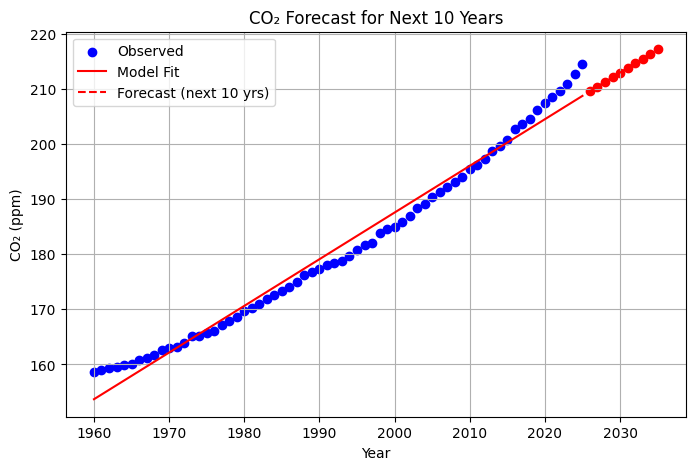

In [ ]:
# ------- Forecast next 10 years -------

# Create future year range
last_year = co2_yearly['Year'].max()
future_years = np.arange(last_year + 1, last_year + 11).reshape(-1, 1)

# ------------------------------------------------
# TODO — Use the fitted CO₂ model to predict future CO₂ levels
# ------------------------------------------------
# 1. Use m_co2.predict() on the future_years array
# 2. Store results in a variable called future_pred


future_pred = m_co2.predict(future_years)

# ----------------------------
# Implementation Ends Here
# ----------------------------

# Combine data for plotting
forecast_df = pd.DataFrame({
    "Year": future_years.flatten(),
    "Predicted_CO2": future_pred
})

print("Forecast for next 10 years:")
print(forecast_df)

# ------- Plot observed, fitted, and forecast -------

plt.figure(figsize=(8,5))

# Observed scatter
plt.scatter(co2_yearly['Year'], co2_yearly['CO2'], label="Observed", color="blue")

# Fitted line over historical period
plt.plot(co2_yearly['Year'], co2_pred, color='red', label="Model Fit")

# Forecast line + points
plt.plot(forecast_df['Year'], forecast_df['Predicted_CO2'], 'r--', label="Forecast (next 10 yrs)")
plt.scatter(forecast_df['Year'], forecast_df['Predicted_CO2'], color='red')

plt.title("CO₂ Forecast for Next 10 Years")
plt.xlabel("Year")
plt.ylabel("CO₂ (ppm)")
plt.grid(True)
plt.legend()
plt.show()


## Questions (Optional)
**1. What does the above plot suggest?**

The linear regression model may not predict the CO2 values for the next 10 years very well.



## Exercise 3 — OLS Statistical Summary and Model Diagnostics (2 points)

So far, we have fit a linear regression model and visualized its predictions and residuals.  
In this exercise, we use `statsmodels` to obtain the full Ordinary Least Squares (OLS) regression report for the CO₂ model.

This summary provides additional statistical insight, including:

- Estimated coefficients and confidence intervals
- Standard errors
- t-statistics and p-values for hypothesis testing
- R-squared and adjusted R-squared

This step reinforces how to interpret a regression model beyond a fitted line and highlights the importance of statistical validation.


In [8]:
import statsmodels.api as sm


# ------------------------------------------------
# TODO — Fit an OLS regression model using statsmodels
# ------------------------------------------------
# 1. Add a constant (intercept) to the predictor using sm.add_constant() on "Year" for co2_yearly
# 2. Fit an Ordinary Least Squares model:
#       model_sm = sm.OLS(y, X).fit() this will be on Yearly CO2 AND X_sm

X_sm = sm.add_constant(co2_yearly[['Year']])
model_sm = sm.OLS(co2_yearly['CO2'], X_sm).fit()

# ----------------------------
# Implementation Ends Here
# ----------------------------


print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:                    CO2   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     3368.
Date:                Wed, 12 Nov 2025   Prob (F-statistic):           4.58e-57
Time:                        14:34:28   Log-Likelihood:                -146.37
No. Observations:                  66   AIC:                             296.7
Df Residuals:                      64   BIC:                             301.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1505.2924     29.061    -51.797      0.0

## Questions (Optional)

- **R-squared:** 0.981
- **Adjusted R-squared:** 0.981
- **t-statistic:** 
  - const: -51.797
  - Year: 58.035




## Exercise 4 — Polynomial Regression for CO₂ (Quadratic) (2 points)

Linear regression assumes a constant rate of change over time.  
However, many real-world processes accelerate or curve over time, and atmospheric CO₂ may not follow a perfectly linear trajectory.

In this exercise, we:

- Fit a **quadratic (2nd-degree polynomial)** model to CO₂ vs. Year  
- Compare the polynomial curve to the linear trend from earlier
- Extend the forecast window to 20 years to see curvature effects
- Visualize observed CO₂ values, the quadratic fit, and future predictions

Mathematically, the model is:

$$
\text{CO₂} = \beta_0 + \beta_1 (\text{Year}) + \beta_2 (\text{Year}^2)
$$


This exercise highlights when polynomial terms can capture accelerating growth patterns better than a simple straight-line trend.


    Year  Predicted_CO2
0   2026     214.670973
1   2027     215.975146
2   2028     217.292783
3   2029     218.623883
4   2030     219.968447
5   2031     221.326473
6   2032     222.697963
7   2033     224.082916
8   2034     225.481333
9   2035     226.893212
10  2036     228.318555
11  2037     229.757362
12  2038     231.209631
13  2039     232.675364
14  2040     234.154560
15  2041     235.647219
16  2042     237.153342
17  2043     238.672928
18  2044     240.205977
19  2045     241.752489


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


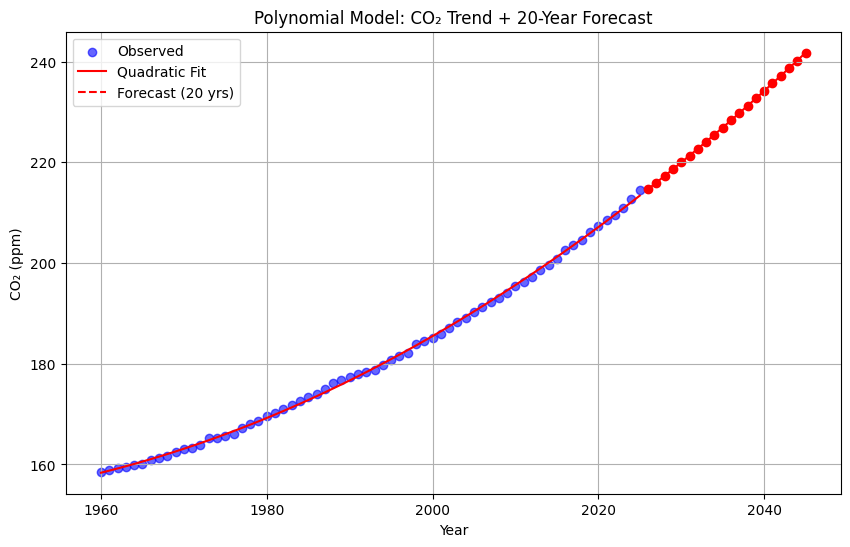

In [ ]:
# Polynomial Regression (Quadratic)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Prepare data
X = co2_yearly[['Year']]
y = co2_yearly['CO2']

# ------------------------------------------------
# TODO — Create and apply polynomial feature transformation
# ------------------------------------------------
# 1. Initialize PolynomialFeatures with degree=2 (quadratic)
# 2. Fit Transform X into polynomial features (adds Year² term)
#    The transformed matrix will have columns: [1, Year, Year²]

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# ------------------------------------------------
# TODO — Fit a linear model on polynomial features
# ------------------------------------------------
# 1. Fit LinearRegression on X_poly and y
# 2. Predict y values (y_poly_pred) using the trained model
#    Note: This is still linear regression — but on expanded features


model_poly = LinearRegression()
model_poly.fit(X_poly, y)
y_poly_pred = model_poly.predict(X_poly)

# ----------------------------
# Implementation Ends Here
# ----------------------------

# Future prediction (next 20 years)
future_years = np.arange(co2_yearly['Year'].max() + 1, co2_yearly['Year'].max() + 21).reshape(-1, 1)
future_poly = poly.transform(future_years)
future_poly_pred = model_poly.predict(future_poly)



forecast_poly_df = pd.DataFrame({
    "Year": future_years.flatten(),
    "Predicted_CO2": future_poly_pred
})

print(forecast_poly_df)

# Plot
plt.figure(figsize=(10,6))
plt.scatter(co2_yearly['Year'], co2_yearly['CO2'], label="Observed", color='blue', alpha=0.6)
plt.plot(co2_yearly['Year'], y_poly_pred, color='red', label="Quadratic Fit")
plt.plot(forecast_poly_df['Year'], forecast_poly_df['Predicted_CO2'], 'r--', label="Forecast (20 yrs)")
plt.scatter(forecast_poly_df['Year'], forecast_poly_df['Predicted_CO2'], color='red')

plt.title("Polynomial Model: CO₂ Trend + 20-Year Forecast")
plt.xlabel("Year")
plt.ylabel("CO₂ (ppm)")
plt.grid(True)
plt.legend()
plt.show()


## Questions (Optional)
**1. What does the above plot suggest?**

Polynomial Regression model can fit the CO2 Trend better than the linear regression model.


## Exercise 5 — OLS Diagnostics for the Polynomial CO₂ Model (2 points)

We now evaluate the quadratic CO₂ model using `statsmodels` to obtain the full OLS regression summary. This allows us to test whether adding the squared term improves model fit in a statistically meaningful way.

Model form:

$$
\text{CO₂} = \beta_0 + \beta_1(\text{Year}) + \beta_2(\text{Year}^2)
$$

What this exercise does:

- Manually constructs polynomial features (`Year` and `Year²`)
- Fits an OLS regression to the polynomial model
- Prints the statistical summary


In [10]:
# -------- OLS for Quadratic Climate Model --------
import statsmodels.api as sm

# Construct polynomial terms manually for OLS
co2_yearly['Year2'] = co2_yearly['Year']**2

X_ols = co2_yearly[['Year','Year2']]
y_ols = co2_yearly['CO2']

# ------------------------------------------------
# TODO — Add an intercept term for OLS
# ------------------------------------------------
# Statsmodels does NOT automatically include a constant (intercept),
# so you must add it manually using sm.add_constant().
# This creates: [1, Year, Year^2]

X_ols = sm.add_constant(X_ols)

# ------------------------------------------------
# TODO — Define the response variable (CO₂ values)
# ------------------------------------------------
# We will fit the quadratic regression: CO₂ = β0 + β1*Year + β2*(Year²) using OLS from stats models


model_poly_ols = sm.OLS(y_ols, X_ols).fit()

# ----------------------------
# Implementation Ends Here
# ----------------------------


print(model_poly_ols.summary())


                            OLS Regression Results                            
Dep. Variable:                    CO2   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.930e+04
Date:                Wed, 12 Nov 2025   Prob (F-statistic):          2.31e-101
Time:                        14:35:35   Log-Likelihood:                -35.014
No. Observations:                  66   AIC:                             76.03
Df Residuals:                      63   BIC:                             82.60
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.522e+04    633.964     39.777      0.0

## Questions (Optional)
**What does the below variables indicate from the above table?**

- **R-squared:** 0.999
- **Adjusted R-squared:** 0.999
- **t-statistic**  
  - const: 39.777
  - Year: -40.823
  - Year2: 42.153

In [11]:
temp = pd.read_csv("mean_temp_change.csv")  # your temp file w/ wide years
temp.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate and Weath...",...,1.139,1.588,1.630,1.597,0.951,0.552,1.418,1.967,1.748,2.188
1,2,Africa,NaN,AFRTMP,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate and Weath...",...,1.195,1.385,1.158,1.150,1.290,1.177,1.400,1.014,1.485,1.750
2,3,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate and Weath...",...,1.702,1.608,1.239,2.155,1.797,1.627,1.719,1.701,2.299,2.925
3,4,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate and Weath...",...,1.134,1.761,1.506,1.203,1.240,2.006,2.424,1.804,2.303,2.824
4,5,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate and Weath...",...,0.738,1.268,1.163,0.917,1.268,1.159,0.997,0.984,1.010,1.588


In [12]:
year_cols = [c for c in temp.columns if c.isdigit()]
temp_long = temp.melt(id_vars=['Country', 'ISO3'], value_vars=year_cols,
                      var_name='Year', value_name='TempChange')

temp_long['Year'] = temp_long['Year'].astype(int)
temp_long['TempChange'] = pd.to_numeric(temp_long['TempChange'], errors='coerce')
temp_long = temp_long.dropna(subset=['TempChange'])

temp_yearly = temp_long.groupby('Year')['TempChange'].mean().reset_index()
temp_yearly.head()

,Year,TempChange
0,1961,0.166804
1,1962,-0.026770
2,1963,-0.016667
3,1964,-0.083521
4,1965,-0.243753


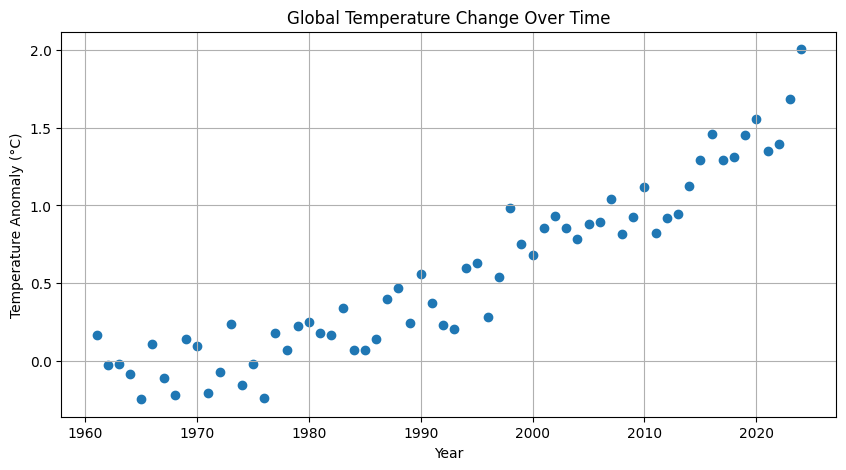

In [13]:
# Scatter plot for Global Temperature
plt.figure(figsize=(10,5))
plt.scatter(temp_yearly['Year'], temp_yearly['TempChange'])
plt.title("Global Temperature Change Over Time")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.grid(True)
plt.show()

## Exercise 6 — Linear Regression of Global Temperature Over Time (2 points)

In this exercise, we apply the same regression workflow used for CO₂ to global temperature anomaly data.  
The goal is to estimate the long-term trend in global mean temperature and evaluate whether a linear model is appropriate.

Procedure:

- Restrict the dataset to years aligned with the CO₂ series
- Fit a linear model: **Temperature Anomaly = β₀ + β₁ × Year**
- Plot observed values and the fitted regression line
- Inspect residuals and normality via:
  - Residual plot
  - Q–Q plot


Temp Trend (°C/yr): 0.027847805340408996
Intercept: -54.92771470297539


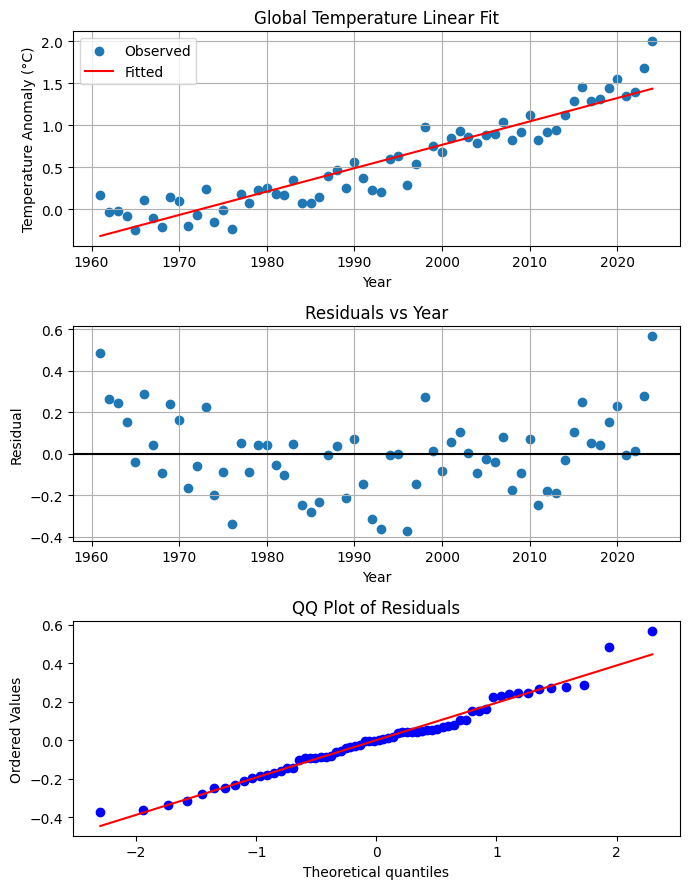

In [14]:
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
import matplotlib.pyplot as plt

# Align temperature years with CO₂ range (remove early sparse years)
temp_yearly = temp_yearly[temp_yearly['Year'] > 1959]

# Model
X_temp = temp_yearly[['Year']]
y_temp = temp_yearly['TempChange']

# ------------------------------------------------
# TODO — Fit a linear regression model for temperature vs. year
# ------------------------------------------------
# 1. Create a LinearRegression() model named m_temp
# 2. Fit the model using X_temp (years) and y_temp (temperature anomaly)
# 3. Use the model to predict fitted values, store in temp_pred

m_temp = LinearRegression()
m_temp.fit(X_temp, y_temp)
temp_pred = m_temp.predict(X_temp)

# ----------------------------
# Implementation Ends Here
# ----------------------------

resid_temp = y_temp - temp_pred

print("Temp Trend (°C/yr):", m_temp.coef_[0])
print("Intercept:", m_temp.intercept_)

# Subplots
fig, axes = plt.subplots(3, 1, figsize=(7, 9))

# 1. Fit plot
axes[0].scatter(temp_yearly['Year'], y_temp, label="Observed")
axes[0].plot(temp_yearly['Year'], temp_pred, color='red', label="Fitted")
axes[0].set_title("Global Temperature Linear Fit")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Temperature Anomaly (°C)")
axes[0].grid(True)
axes[0].legend()

# 2. Residual plot
axes[1].scatter(temp_yearly['Year'], resid_temp)
axes[1].axhline(0, color='black')
axes[1].set_title("Residuals vs Year")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Residual")
axes[1].grid(True)

# 3. QQ plot
stats.probplot(resid_temp, dist="norm", plot=axes[2])
axes[2].set_title("QQ Plot of Residuals")

plt.tight_layout()
plt.show()


## Questions (Optional)
**1. What does the residual plot suggest?**

It suggests the difference between the predicted value and the actual value.

**2. What does the QQ plot of residuals suggest?**

It suggests the linear relationship between the observed values and the theoretical quantiles.

**3. Do you think tehre is a linear realtionship betwene year and temperature levels?**

Yes.

## Exercise 7 — Forecasting Global Temperature Using the Linear Trend (2 points)

Next, we use the fitted linear temperature model to generate a forward projection. The idea is similar to the CO₂ forecast, but applied to temperature anomaly data.

Steps performed:

- Identify the last year in the dataset
- Generate the next 20 years as prediction points
- Apply the linear regression model to estimate future temperature anomalies
- Plot observed data, fitted line, and future forecast



Temperature Forecast (next 20 years):
    Year  Predicted_TempChange
0   2025              1.464091
1   2026              1.491939
2   2027              1.519787
3   2028              1.547635
4   2029              1.575482
5   2030              1.603330
6   2031              1.631178
7   2032              1.659026
8   2033              1.686874
9   2034              1.714721
10  2035              1.742569
11  2036              1.770417
12  2037              1.798265
13  2038              1.826113
14  2039              1.853960
15  2040              1.881808
16  2041              1.909656
17  2042              1.937504
18  2043              1.965352
19  2044              1.993199


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


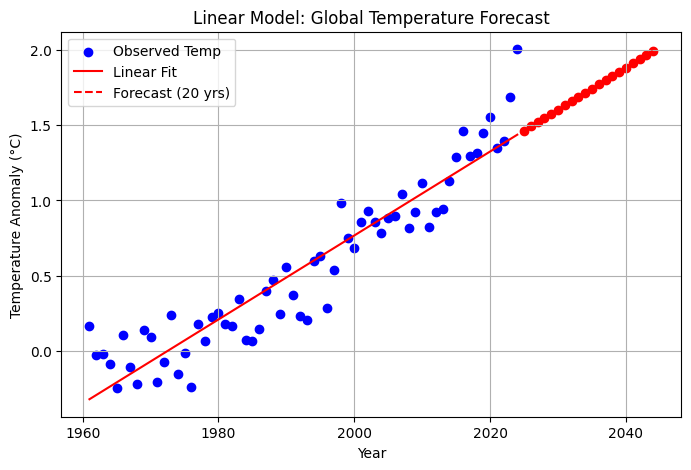

In [ ]:
# ---- Forecast next 20 years for temperature ----

last_year_temp = temp_yearly['Year'].max()
future_years_temp = np.arange(last_year_temp + 1, last_year_temp + 21).reshape(-1, 1)

# ------------------------------------------------
# TODO — Forecast future temperature using your fitted model
# ------------------------------------------------
# 1. Use the trained model m_temp
# 2. Apply .predict() to the array of future years
# 3. Store the result in future_temp_pred
future_temp_pred = m_temp.predict(future_years_temp)

# ----------------------------
# Implementation Ends Here
# ----------------------------

forecast_temp_df = pd.DataFrame({
    "Year": future_years_temp.flatten(),
    "Predicted_TempChange": future_temp_pred
})

print("Temperature Forecast (next 20 years):")
print(forecast_temp_df)

# ---- Plot observed, fitted, and forecast ----

plt.figure(figsize=(8,5))

# Observed scatter
plt.scatter(temp_yearly['Year'], temp_yearly['TempChange'], label="Observed Temp", color="blue")

# Fitted line
plt.plot(temp_yearly['Year'], temp_pred, color='red', label="Linear Fit")

# Forecast line + points
plt.plot(forecast_temp_df['Year'], forecast_temp_df['Predicted_TempChange'], 'r--', label="Forecast (20 yrs)")
plt.scatter(forecast_temp_df['Year'], forecast_temp_df['Predicted_TempChange'], color='red')

plt.title("Linear Model: Global Temperature Forecast")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.grid(True)
plt.legend()
plt.show()


## Questions (Optional)
**1. What does the above plot suggest?**

It suggests that linear regression model cannot fit the global temperature very well.


## Exercise 8 — OLS Summary for the Linear Temperature Model (2 points)

We now evaluate the linear temperature regression using `statsmodels` to obtain full OLS diagnostics.  
This mirrors the earlier analysis for CO₂, providing formal statistical evidence for the fitted trend.

Model form:

$$
\text{Temperature} = \beta_0 + \beta_1 (\text{Year})
$$

What this step provides:

- Estimated intercept and slope (warming rate per year)
- Standard errors and p-values
- Confidence intervals for parameters
- R-squared and adjusted R-squared


In [16]:
import statsmodels.api as sm

# ------------------------------------------------
# TODO — Fit an OLS model for Temperature ~ Year
# ------------------------------------------------
# 1. Add a constant term to the predictor using sm.add_constant() for temp_yearly['Year']
#    (statsmodels does NOT automatically include an intercept)
# 2. Assign the temperature data to y_temp_ols
# 3. Fit an OLS model: sm.OLS(y, X).fit() on y_temp_ols, X_temp_ols

X_temp_ols = sm.add_constant(temp_yearly[['Year']])
y_temp_ols = temp_yearly['TempChange']

model_temp_ols = sm.OLS(y_temp_ols, X_temp_ols).fit()

# ----------------------------
# Implementation Ends Here
# ----------------------------

print(model_temp_ols.summary())


                            OLS Regression Results                            
Dep. Variable:             TempChange   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     451.1
Date:                Wed, 12 Nov 2025   Prob (F-statistic):           3.80e-30
Time:                        14:36:31   Log-Likelihood:                 15.232
No. Observations:                  64   AIC:                            -26.46
Df Residuals:                      62   BIC:                            -22.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -54.9277      2.613    -21.023      0.0

## Questions (Optional)
**What does the below variables indicate from the above table?**

- **R-squared:** 0.879
- **Adjusted R-squared:** 0.877
- **t-statistic**  
  - const: -21.023
  - Year: 21.238


## Exercise 9 — Polynomial Regression for Global Temperature (2 points)

In this exercise, we extend the temperature model by introducing a quadratic term.  
The goal is to test whether a curved trend fits the long-term temperature data better than a straight line.

Model form:

$$
\text{Temperature} = \beta_0 + \beta_1(\text{Year}) + \beta_2(\text{Year}^2)
$$

Steps performed:

- Generate polynomial features (Year and Year²)
- Fit a 2nd-degree regression model to temperature data
- Forecast the next 20 years using the polynomial model
- Plot:
  - Observed temperature
  - Quadratic fit
  - 20-year forecast extension

Quadratic Temp Forecast (next 20 years):
    Year  Predicted_TempChange
0   2025              1.733613
1   2026              1.786340
2   2027              1.839820
3   2028              1.894055
4   2029              1.949043
5   2030              2.004786
6   2031              2.061282
7   2032              2.118532
8   2033              2.176536
9   2034              2.235294
10  2035              2.294806
11  2036              2.355072
12  2037              2.416092
13  2038              2.477866
14  2039              2.540393
15  2040              2.603675
16  2041              2.667710
17  2042              2.732499
18  2043              2.798042
19  2044              2.864339


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


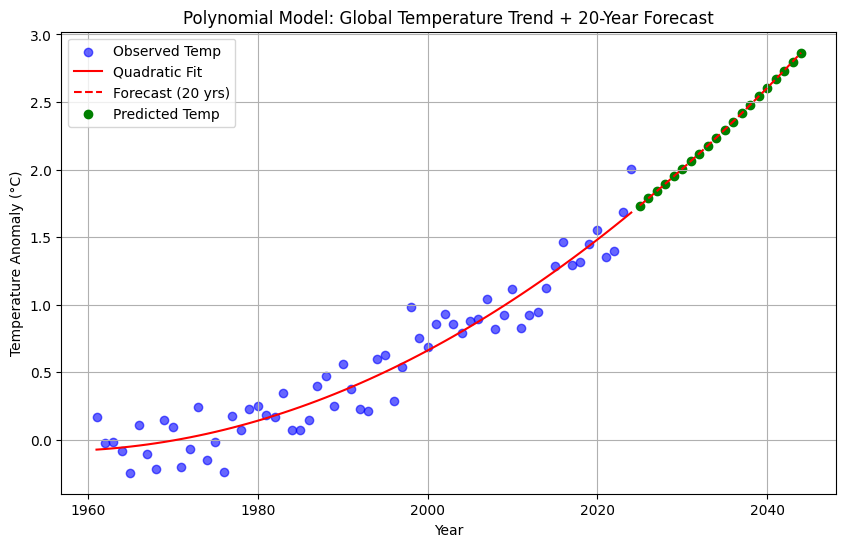

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Prepare data
X_temp = temp_yearly[['Year']]
y_temp = temp_yearly['TempChange']

# ------------------------------------------------
# TODO — Create and transform polynomial features (degree = 2)
# ------------------------------------------------
# 1. Initialize PolynomialFeatures with degree=2
# 2. Transform the year column to include Year and Year² terms
#    The transformed matrix adds:
#      [1, Year, Year²]

poly_temp = PolynomialFeatures(degree=2)
X_temp_poly = poly_temp.fit_transform(X_temp)

# ------------------------------------------------
# TODO — Fit the quadratic regression model and make predictions
# ------------------------------------------------
# 1. Fit a LinearRegression model on the transformed features
# 2. Generate fitted values (y_temp_poly_pred)

model_temp_poly = LinearRegression()
model_temp_poly.fit(X_temp_poly, y_temp)
y_temp_poly_pred = model_temp_poly.predict(X_temp_poly)

# ----------------------------
# Implementation Ends Here
# ----------------------------

# Forecast next 20 years
future_years_temp = np.arange(temp_yearly['Year'].max() + 1, temp_yearly['Year'].max() + 21).reshape(-1, 1)
future_temp_poly = poly_temp.transform(future_years_temp)
future_temp_poly_pred = model_temp_poly.predict(future_temp_poly)

forecast_temp_poly_df = pd.DataFrame({
    "Year": future_years_temp.flatten(),
    "Predicted_TempChange": future_temp_poly_pred
})

print("Quadratic Temp Forecast (next 20 years):")
print(forecast_temp_poly_df)

# Plot observed, fitted, forecast
plt.figure(figsize=(10,6))

plt.scatter(temp_yearly['Year'], temp_yearly['TempChange'], label="Observed Temp", color='blue', alpha=0.6)
plt.plot(temp_yearly['Year'], y_temp_poly_pred, color='red', label="Quadratic Fit")
plt.plot(forecast_temp_poly_df['Year'], forecast_temp_poly_df['Predicted_TempChange'], 'r--', label="Forecast (20 yrs)")
plt.scatter(forecast_temp_poly_df['Year'], forecast_temp_poly_df['Predicted_TempChange'], color='green', label="Predicted Temp")

plt.title("Polynomial Model: Global Temperature Trend + 20-Year Forecast")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.grid(True)
plt.legend()
plt.show()


## Questions (Optional)
**What does the above plot say?**

The current polynomial regression model is better than linear regression model, but it also cannot fit the global temperature very well. We may need to try to use another model form.

## Exercise 10 — OLS Diagnostics for the Polynomial Temperature Model (2 points)

We now evaluate the quadratic temperature regression model using `statsmodels` to examine coefficient significance and overall model quality.

Model:

$$
\text{Temperature} = \beta_0 + \beta_1(\text{Year}) + \beta_2(\text{Year}^2)
$$

What this step does:

- Creates `Year²` manually to match the polynomial model structure
- Fits an OLS model using both `Year` and `Year²`
- Displays the full regression summary



In [18]:
import statsmodels.api as sm

# Create polynomial terms manually for OLS
temp_yearly['Year2'] = temp_yearly['Year']**2

X_temp_ols_poly = temp_yearly[['Year', 'Year2']]
y_temp_ols_poly = temp_yearly['TempChange']


# ------------------------------------------------
# TODO — Add constant term and define response variable
# ------------------------------------------------
# 1. Add an intercept column using sm.add_constant() to X_temp_ols_poly
# 2. Fit OLS to y_temp_ols_poly, X_temp_ols_poly using statsmodel

X_temp_ols_poly = sm.add_constant(X_temp_ols_poly)
model_temp_poly_ols = sm.OLS(y_temp_ols_poly, X_temp_ols_poly).fit()

# ----------------------------
# Implementation Ends Here
# ----------------------------
print(model_temp_poly_ols.summary())


                            OLS Regression Results                            
Dep. Variable:             TempChange   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     366.1
Date:                Wed, 12 Nov 2025   Prob (F-statistic):           1.05e-34
Time:                        14:37:05   Log-Likelihood:                 29.696
No. Observations:                  64   AIC:                            -53.39
Df Residuals:                      61   BIC:                            -46.92
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1441.4710    253.455      5.687      0.0

## Questions (Optional)
**What does the below variables indicate from the above table?**

- **R-squared:** 0.923
- **Adjusted R-squared:** 0.921 
- **t-statistic**  
  - const: 5.687
  - Year: -5.795
  - Year2: 5.904

## Exercise 11 — Forecasting Temperature Using the CO₂ Regression Model (2 points)

In this exercise, we link the CO₂ and temperature models to create a chained forecast:

1. **Forecast future CO₂** using the CO₂~Year regression model
2. **Feed those predicted CO₂ values** into the Temp~CO₂ model
3. **Produce a temperature forecast** based on projected CO₂ levels
4. Plot observed temperature, model estimates, and future predictions

This approach uses CO₂ as a predictor for temperature instead of time alone, allowing us to model temperature as a function of atmospheric composition.

Conceptually:
$$

\text{CO₂}_{(future)} = f(\text{Year})
\quad \Rightarrow \quad
\text{Temp}_{(future)} = g(\text{CO₂}_{(future)})


$$



Temp change per ppm CO2 (using fitted CO2): 0.03290059934384475
Intercept: -5.402691559460786


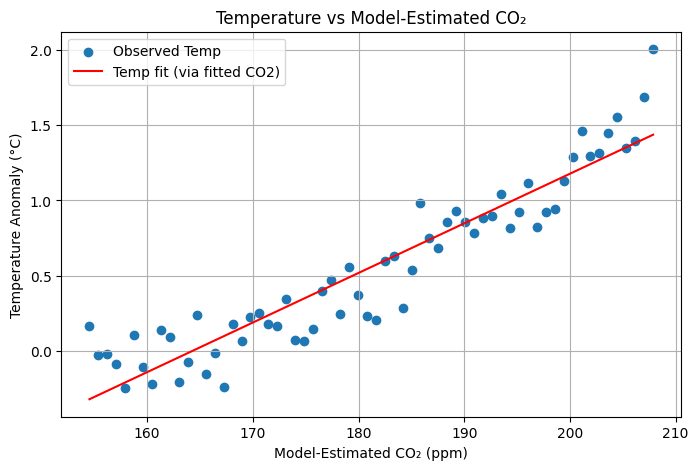

In [19]:
# Merge fitted CO2 into yearly temperature
merged = pd.merge(co2_yearly, temp_yearly, on='Year')

# ------------------------------------------------
# TODO — Generate model-estimated CO₂ values
# ------------------------------------------------
# Use the previously fitted m_co2 model to predict CO₂ from Year

merged['Fitted_CO2'] = m_co2.predict(merged[['Year']])

# ------------------------------------------------
# TODO — Fit temperature model using fitted CO₂ instead of observed CO₂
# ------------------------------------------------
# Fit a regression: TempChange ~ Fitted_CO2
# This isolates temperature response to the CO₂ trend component only

m_temp_from_fitted = LinearRegression()
m_temp_from_fitted.fit(merged[['Fitted_CO2']], merged['TempChange'])
temp_pred_from_fitted = m_temp_from_fitted.predict(merged[['Fitted_CO2']])

# ----------------------------
# Implementation Ends Here
# ----------------------------

print("Temp change per ppm CO2 (using fitted CO2):", m_temp_from_fitted.coef_[0])
print("Intercept:", m_temp_from_fitted.intercept_)

# Plot historical relationship using fitted CO2
plt.figure(figsize=(8,5))
plt.scatter(merged['Fitted_CO2'], merged['TempChange'], label="Observed Temp")
plt.plot(merged['Fitted_CO2'], temp_pred_from_fitted, color='red', label="Temp fit (via fitted CO2)")
plt.xlabel("Model-Estimated CO₂ (ppm)")
plt.ylabel("Temperature Anomaly (°C)")
plt.title("Temperature vs Model-Estimated CO₂")
plt.grid(True)
plt.legend()
plt.show()


## Questions (Optional)
**What does the above plot say?**

There seems to be a linear relationship between temperature and CO2.

   Year    Pred_CO2  Pred_Temp_From_CO2
0  2026  209.559419            1.491939
1  2027  210.405841            1.519787
2  2028  211.252264            1.547635
3  2029  212.098686            1.575482
4  2030  212.945109            1.603330


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


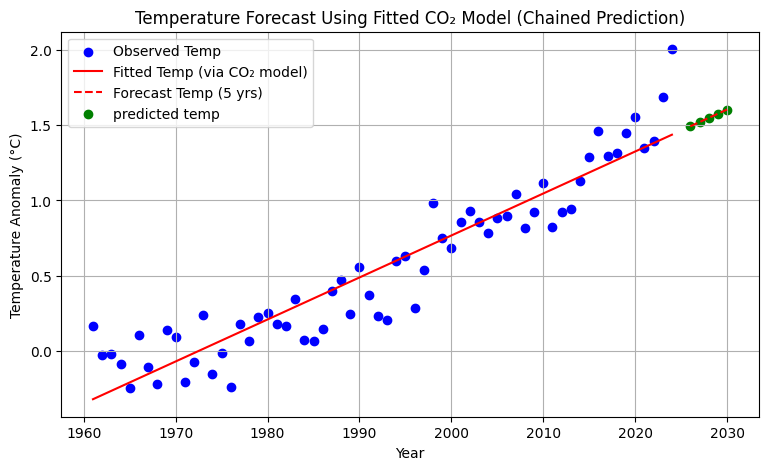

In [20]:
# Forecast next 5 years using m_co2 model
last_year = co2_yearly['Year'].max()
future_years = np.arange(last_year + 1, last_year + 6).reshape(-1, 1)

future_co2_est = m_co2.predict(future_years)  

# Predict temperature from those CO₂ forecasts
future_temp_est = m_temp_from_fitted.predict(future_co2_est.reshape(-1,1))

forecast_chain = pd.DataFrame({
    "Year": future_years.flatten(),
    "Pred_CO2": future_co2_est,
    "Pred_Temp_From_CO2": future_temp_est
})

print(forecast_chain)
plt.figure(figsize=(9,5))

# Observed
plt.scatter(merged['Year'], merged['TempChange'], label="Observed Temp", color='blue')

# Fitted historical temps
plt.plot(merged['Year'], temp_pred_from_fitted, color='red', label="Fitted Temp (via CO₂ model)")

# Forecast temps
plt.plot(forecast_chain['Year'], forecast_chain['Pred_Temp_From_CO2'], 'r--', label="Forecast Temp (5 yrs)")
plt.scatter(forecast_chain['Year'], forecast_chain['Pred_Temp_From_CO2'], color='green', label="predicted temp")

plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.title("Temperature Forecast Using Fitted CO₂ Model (Chained Prediction)")
plt.grid(True)
plt.legend()
plt.show()




## Questions (Optional)
**What does the above plot say?**

The relationship between CO2 and global temperature can be approximated to a linear model.
